In [1]:
import imageio as iio

In [2]:
img=iio.imread("C:\\Users\\ghosh\\Downloads\\file.png")

C:\Users\ghosh\AppData\Local\Temp\ipykernel_25244\2108078072.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=iio.imread("C:\\Users\\ghosh\\Downloads\\file.png")


In [3]:
print(img)

[[[242 246 250 255]
  [242 246 250 255]
  [242 246 250 255]
  ...
  [226 232 249 255]
  [226 232 249 255]
  [226 232 249 255]]

 [[242 246 250 255]
  [242 246 250 255]
  [242 246 250 255]
  ...
  [226 232 249 255]
  [226 232 249 255]
  [226 232 249 255]]

 [[242 246 250 255]
  [242 246 250 255]
  [242 246 250 255]
  ...
  [226 232 249 255]
  [226 232 249 255]
  [226 232 249 255]]

 ...

 [[195 190 187 255]
  [195 190 187 255]
  [197 190 187 255]
  ...
  [ 33  19  22 255]
  [ 77  63  66 255]
  [ 61  47  50 255]]

 [[196 191 188 255]
  [197 191 188 255]
  [198 191 188 255]
  ...
  [ 30  15  19 255]
  [ 76  61  64 255]
  [ 52  36  40 255]]

 [[197 193 189 255]
  [198 192 189 255]
  [198 191 188 255]
  ...
  [ 23   8  12 255]
  [ 69  53  57 255]
  [ 38  22  26 255]]]


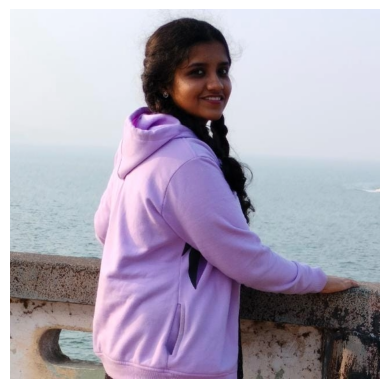

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(img.astype(np.uint8))
plt.axis('off') 
plt.show()

In [5]:
print(img.shape)

(640, 640, 4)


In [6]:
x=img.reshape(-1,img.shape[2])

In [7]:
print(x)

[[242 246 250 255]
 [242 246 250 255]
 [242 246 250 255]
 ...
 [ 23   8  12 255]
 [ 69  53  57 255]
 [ 38  22  26 255]]


In [8]:
print(x.shape)

(409600, 4)


In [9]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=20,random_state=0).fit(x)

In [10]:
from scipy.stats import mode
colors = np.zeros((kmeans.n_clusters, img.shape[2]), dtype=np.uint8)
for i in range(kmeans.n_clusters):
    cluster_pixels = x[kmeans.labels_ == i]
    colors[i] = mode(cluster_pixels, axis=0)[0][0]

In [11]:
new_img = colors[kmeans.labels_]
new_img = new_img.reshape(img.shape)

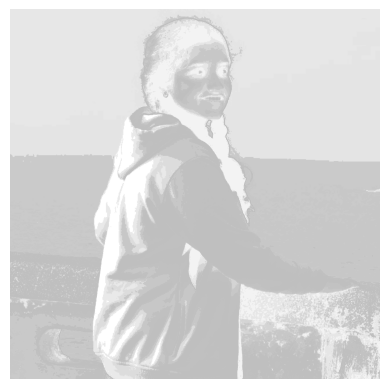

In [12]:
#X-Ray
plt.imshow(new_img.astype(np.uint8))
plt.axis('off') 
plt.show()

In [13]:
mean_colors = np.zeros((kmeans.n_clusters, 4))
for i in range(kmeans.n_clusters):
    mean_colors[i] = np.mean(x[kmeans.labels_ == i], axis=0)


In [14]:
new_img = mean_colors[kmeans.labels_]
new_img = new_img.reshape(img.shape)


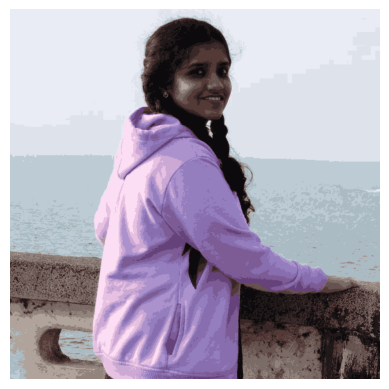

In [15]:
plt.imshow(new_img.astype(np.uint8))  # Convert to uint8 for displaying
plt.axis('off')
plt.show()

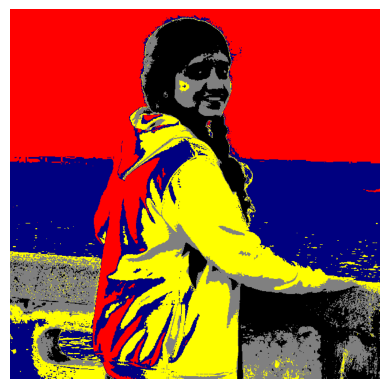

In [16]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(x)
colors = np.array([[255, 0, 0], [128, 128, 128], [0, 0, 128], [255, 255, 0], [0, 0, 0]])
new_img = colors[kmeans.labels_]
new_img = new_img.reshape((img.shape[0], img.shape[1], 3))
plt.imshow(new_img)
plt.axis('off')  # Hide axes
plt.show()